## Generating code for processing images
In case chatGPT's knowledge base contains solutions for tasks we ask for, such as image analysis tasks, it can create quite sophisticated image analysis scripts.

We define a helper function for making prompts first.

In [1]:
import openai
import matplotlib.pyplot as plt

def prompt(message:str, model="gpt-3.5-turbo"):
    """A prompt helper function that sends a message to openAI
    and returns only the text response.
    """
    client = openai.OpenAI()
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": message}]
    )
    return response.choices[0].message.content

A _simple_ task could be described like in the following. We explictly specify that this should execute from Jupyter to prevent windows popping up.

In [2]:
simple_question = """
Write Python code only and no additional explanatory text.

Write a python program, that 
* loads the file `../../data/blobs.tif`,
* labels objects in this image, and
* visualize results.

Assume this program would be executed in a Jupyter notebook.
It is not necessary to save the results. Show the results in Jupyter.
"""

The generated code looks like this.

In [3]:
code = prompt(simple_question)
print(code)

```python
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.segmentation import mark_boundaries

# Load the image
image = imread('../../data/blobs.tif')

# Threshold the image
thresh = threshold_otsu(image)
binary = image > thresh

# Label the objects
labeled_image, num_labels = label(binary, connectivity=2, return_num=True)

# Find object centroids
centroids = peak_local_max(image, labels=labeled_image, min_distance=10)

# Visualize results
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mark_boundaries(image, labeled_image, color=(1, 0, 0)))
ax.plot(centroids[:, 1], centroids[:, 0], 'b+', markersize=10)
ax.set_axis_off()
plt.show()
```


This code needs a little cleaning, before we can execute it.

In [4]:
cleaner_code = code.replace("```python", "").replace("```", "")

We now excute the code. Note in more advanced scenarios there is a risk when executing generated code. We could delete files unintentionally for example.

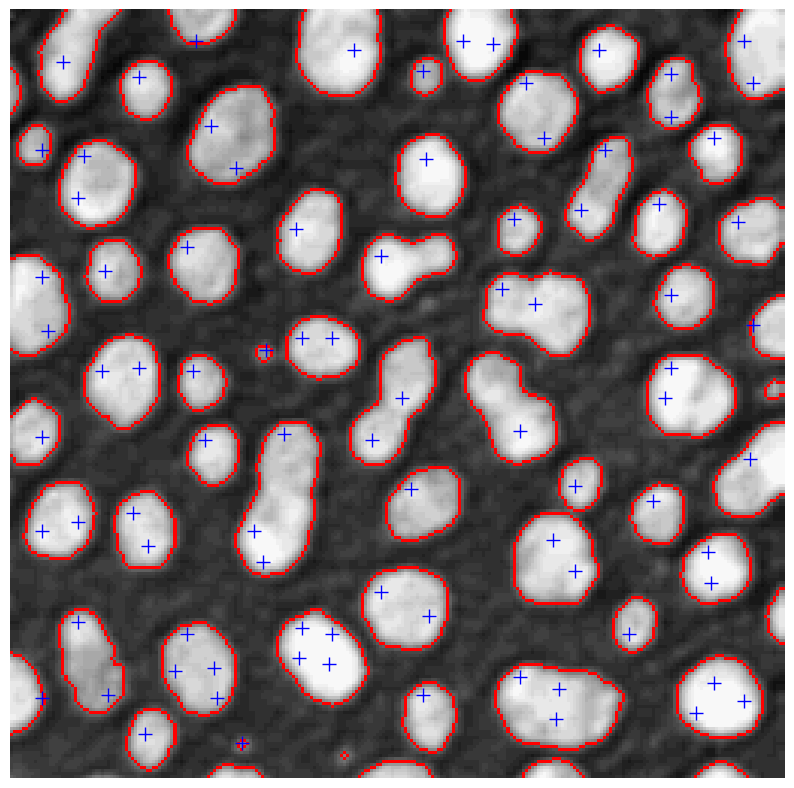

In [5]:
exec(cleaner_code)

## Exercises
* Rerun the code above. Is the output the same? If not, why?
* Modify the code above so that the output of the script is the number of blobs in the image.